### Comparing L1000 and Cell painting median MOA scores based on visualization

- Visualizing the median scores of cell painting MOAs vs L1000 MOAs using scatter plot.

- Visualizing the median scores distribution of both cell painting and L1000.

In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

import warnings

warnings.filterwarnings("ignore", message="Glyph 147 missing from current font.")
warnings.filterwarnings("ignore", message="Glyph 128 missing from current font.")

In [2]:
df_cp_modz = pd.read_csv(os.path.join('../cell_painting/moa_sizes_consensus_datasets', 'modz_moa_median_scores.csv'))
df_L1_modz = pd.read_csv(os.path.join('../L1000/moa_sizes_consensus_datasets', 'modz_moa_median_scores.csv'))

In [3]:
def melt_df(df, col_name):
    """
    This function returns a reformatted dataframe with 
    3 columns: MOA, dose number and dose_values(median score or p-value)
    """
    df = df.melt(id_vars=['moa', 'moa_size'], var_name="dose", value_name=col_name)
    return df

In [4]:
def merge_cp_L1000_medians(df_cp, df_L1, col_name):
    """
    This function merges the median scores values 
    of cell painting and L1000 MOAs into a single dataframe
    """
 
    idx_list = [idx for idx, moa in enumerate(df_cp['moa']) if moa in df_L1['moa'].values.tolist()]
    df_cp = df_cp.loc[idx_list].reset_index(drop=True)
    df_L1_med = melt_df(df_L1, 'L1000_scores')
    df_cp_med = melt_df(df_cp, 'cp_scores')
    df_cp_med['L1000'] = df_L1_med['L1000_scores']
    df_cp_med.rename(columns={"cp_scores": "Cell_Painting"}, inplace = True)
    df_cp_L1_med = df_cp_med.melt(id_vars=['moa', 'moa_size', 'dose'], 
                                  var_name="profile_tech", value_name=col_name)
    
    return df_cp_med, df_cp_L1_med

In [5]:
df_cp_L1_meds, df_median_scores = merge_cp_L1000_medians(df_cp_modz, df_L1_modz, 'median_scores')

In [6]:
def plot_median_score(df, text, path, file_name):
    """plot L1000 vs Cell Painting median scores for each MOA for all doses"""
    
    if not os.path.exists(path):
        os.mkdir(path)
        
    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(12,8)) 
    plt.xlabel("Cell painting median scores")
    plt.ylabel("L1000 median scores")
    plt.title("L1000 vs Cell Painting median scores for " + text)
    fig = sns.scatterplot(data=df, x="Cell_Painting", y="L1000", hue="dose", style="dose")
    plt.savefig(os.path.join(path, file_name))
    plt.show()

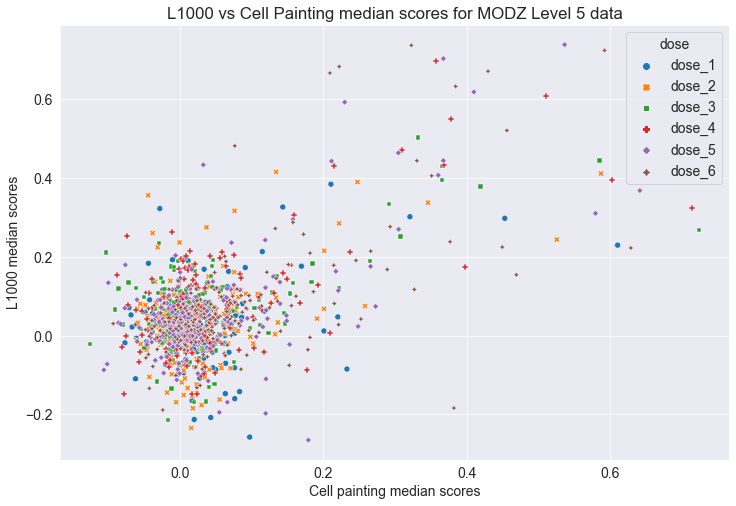

In [7]:
plot_median_score(df_cp_L1_meds, 'MODZ Level 5 data', 'L1000_cp_figures', 'L1000_cp_median_scores.png')

In [8]:
def plot_median_distribution(df_median_scores, file_path, plot_type = "hist"):
    """
    This function plot the frequency distribution of the median scores 
    of MOAs measured in cell painting and L1000
    """
    
    dist_plt = sns.displot(df_median_scores, x = 'median_scores', col = 'dose', col_wrap=3, hue='profile_tech',
                          height=5.5, aspect=1.0, kind=plot_type)
    dist_plt.legend.set_title("")
    axes = dist_plt.axes.flatten()
    dose_list = ["Dose 1", "Dose 2", "Dose 3", "Dose 4", "Dose 5", "Dose 6"]
    for idx, name in enumerate(dose_list):
        axes[idx].set_title(name)
    plt.savefig(file_path)
    plt.show()

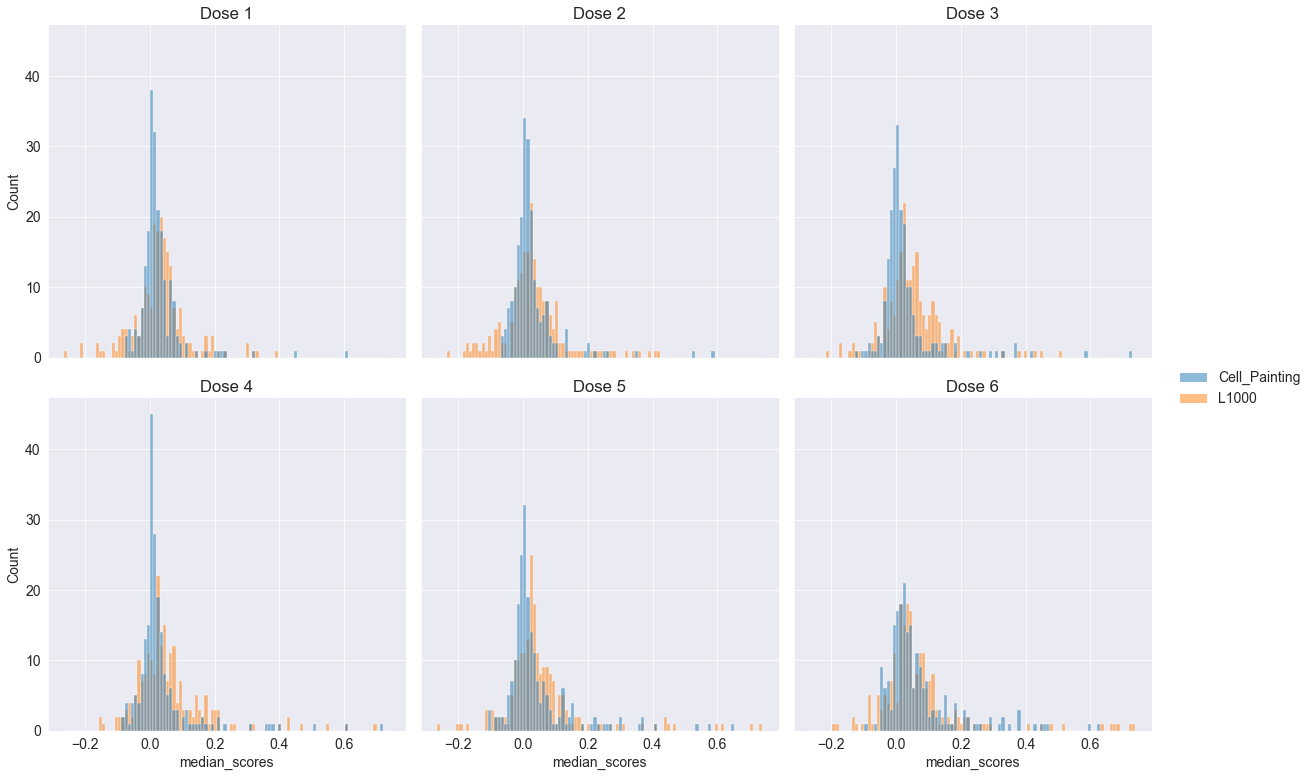

In [9]:
plot_median_distribution(df_median_scores, os.path.join('L1000_cp_figures', 'median_distribution_hist.png'))

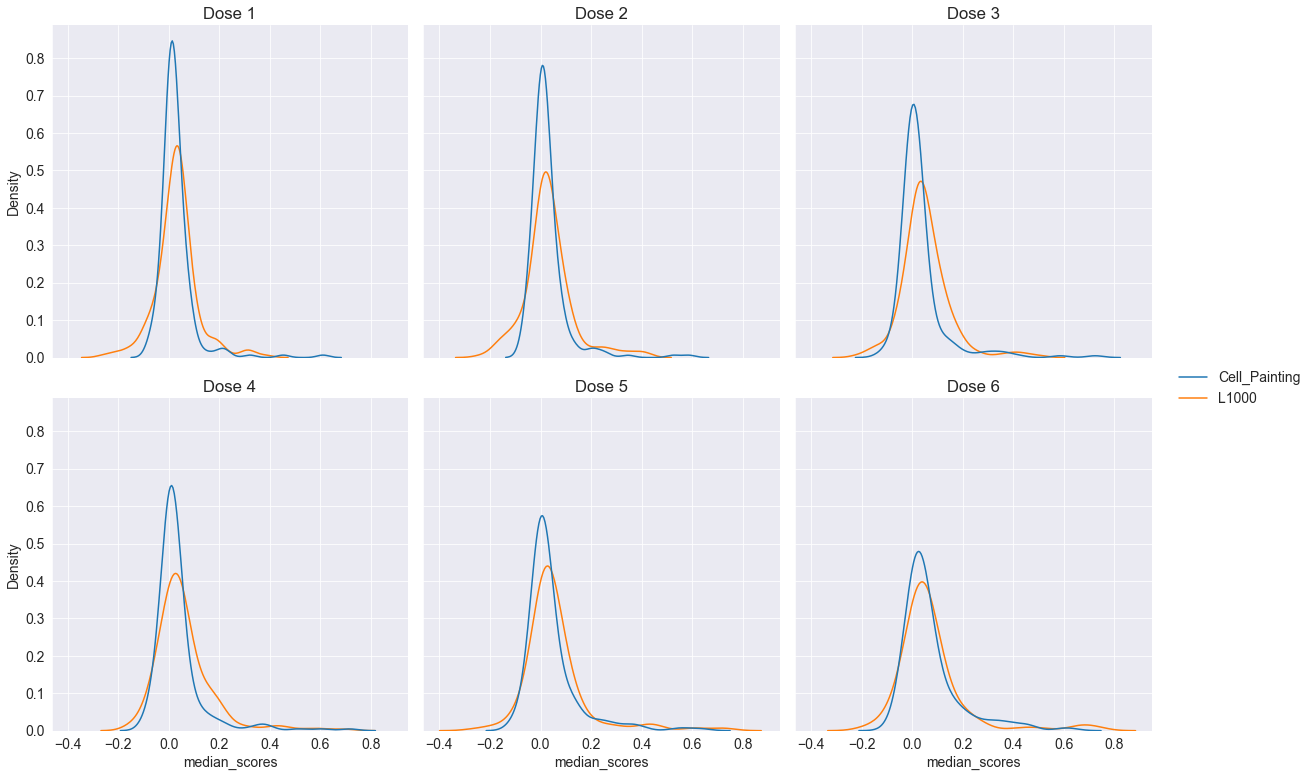

In [10]:
plot_median_distribution(df_median_scores, os.path.join('L1000_cp_figures', 'median_distribution_density.png'), "kde")